In [5]:
import zipfile
zip_ref = zipfile.ZipFile('C://Users//musta//Downloads//archive_141.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras import losses
import time

In [7]:
import zipfile
import os

zip_path = 'C://Users//musta//Downloads//archive_141.zip'
extract_dir = 'C://Users//musta//Downloads//extracted_data'

# Extract the ZIP file to the specified directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Update the data directory path to the extracted directory
data_dir = os.path.join(extract_dir, 'Skin_Data')

# Rest of your code
batch_size = 32
img_height = 180
img_width = 180

# Continue with the rest of your code, using the updated data_dir variable


In [8]:
train_dir = os.path.join(data_dir, "Training")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = r'C:\Users\musta\Downloads\extracted_data\Skin_Data\training',
    labels='inferred',
    label_mode='binary',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 84 files belonging to 2 classes.
Using 68 files for training.


In [9]:
val_dir = os.path.join(data_dir, "Training")
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=r'C:\Users\musta\Downloads\extracted_data\Skin_Data\testing',
    labels='inferred',
    label_mode='binary',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 204 files belonging to 2 classes.
Using 40 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['0', '1']


In [11]:
print(train_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>


In [13]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32, 1)


In [14]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [15]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.03169933 1.0


In [16]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [18]:
input_shape = (180,180,3)

model = tf.keras.models.Sequential([
    # since Conv2D is the first layer of the neural network, we should also specify the size of the input
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    # apply pooling
    tf.keras.layers.MaxPooling2D(2,2),
    # and repeat the process
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # flatten the result to feed it to the dense layer
    tf.keras.layers.Flatten(), 
    # and define 512 neurons for processing the output coming by the previous layers
    tf.keras.layers.Dense(512, activation='relu'), 
    # a single output neuron. The result will be 0 if the image is a cat, 1 if it is a dog
    tf.keras.layers.Dense(1, activation='sigmoid')  
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 64)       0

In [19]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [20]:
epochs = 20
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=epochs)

Epoch 1/20
3/3 [==============================] - 5s 701ms/step - loss: 622.4568 - accuracy: 0.5294 - val_loss: 821.0242 - val_accuracy: 0.1000
Epoch 2/20
3/3 [==============================] - 1s 221ms/step - loss: 294.6704 - accuracy: 0.5000 - val_loss: 5.5081 - val_accuracy: 0.9000
Epoch 3/20
3/3 [==============================] - 1s 257ms/step - loss: 15.9651 - accuracy: 0.5294 - val_loss: 11.1323 - val_accuracy: 0.1000
Epoch 4/20
3/3 [==============================] - 1s 261ms/step - loss: 3.0507 - accuracy: 0.6029 - val_loss: 0.4166 - val_accuracy: 0.8500
Epoch 5/20
3/3 [==============================] - 1s 258ms/step - loss: 0.5204 - accuracy: 0.7500 - val_loss: 4.6456 - val_accuracy: 0.1000
Epoch 6/20
3/3 [==============================] - 1s 241ms/step - loss: 0.7779 - accuracy: 0.6912 - val_loss: 0.4696 - val_accuracy: 0.8750
Epoch 7/20
3/3 [==============================] - 1s 252ms/step - loss: 0.4405 - accuracy: 0.7941 - val_loss: 3.0484 - val_accuracy: 0.1000
Epoch 8/20
3

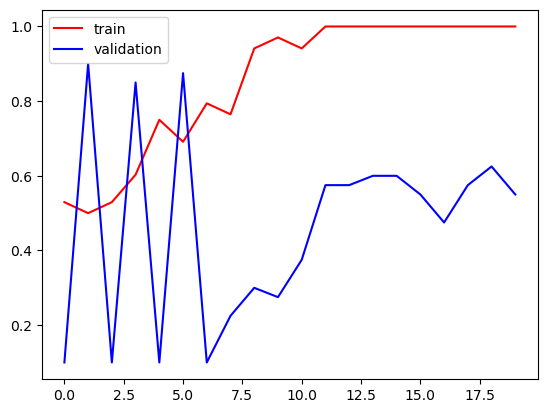

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


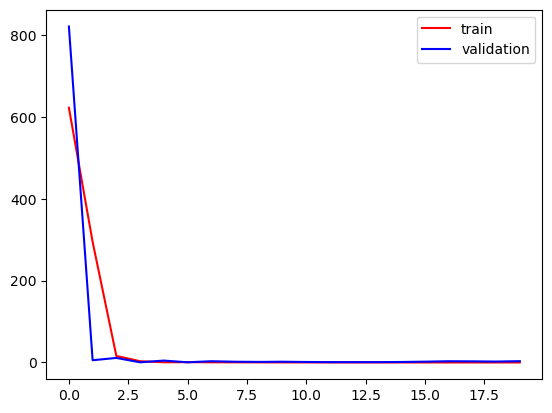

In [22]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

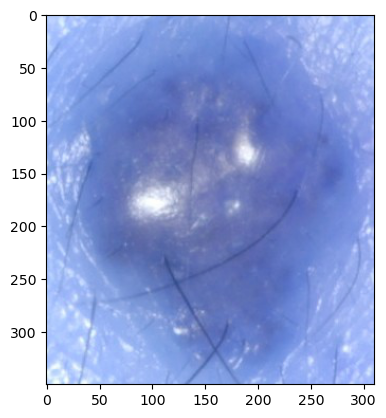

1/1 [==============================] - 0s 103ms/step
[[[[192 215 255]
   [191 214 255]
   [187 210 254]
   ...
   [167 191 255]
   [168 190 253]
   [167 191 251]]

  [[189 213 255]
   [188 211 255]
   [186 208 253]
   ...
   [173 197 255]
   [172 196 254]
   [171 195 252]]

  [[185 209 255]
   [185 209 255]
   [184 207 253]
   ...
   [181 205 255]
   [179 203 255]
   [176 200 252]]

  ...

  [[199 214 253]
   [200 218 255]
   [201 222 254]
   ...
   [167 190 255]
   [166 189 255]
   [163 185 255]]

  [[192 210 254]
   [194 214 255]
   [193 217 254]
   ...
   [166 190 255]
   [165 187 255]
   [163 185 255]]

  [[185 208 252]
   [187 211 254]
   [189 214 255]
   ...
   [165 189 255]
   [163 186 254]
   [163 186 254]]]]
1/1 [==============================] - 0s 51ms/step


array([[[[152, 171, 216],
         [152, 171, 216],
         [153, 172, 217],
         ...,
         [191, 205, 241],
         [187, 201, 238],
         [185, 198, 236]],

        [[152, 171, 216],
         [152, 171, 216],
         [153, 172, 217],
         ...,
         [189, 203, 239],
         [186, 199, 237],
         [184, 197, 235]],

        [[153, 172, 217],
         [152, 171, 216],
         [152, 171, 216],
         ...,
         [185, 199, 235],
         [184, 197, 235],
         [183, 196, 234]],

        ...,

        [[161, 176, 222],
         [161, 176, 222],
         [160, 176, 223],
         ...,
         [170, 180, 227],
         [174, 185, 230],
         [176, 187, 231]],

        [[161, 176, 222],
         [161, 176, 222],
         [160, 176, 223],
         ...,
         [171, 181, 228],
         [173, 184, 229],
         [175, 186, 230]],

        [[161, 176, 222],
         [161, 176, 222],
         [160, 176, 223],
         ...,
         [171, 181, 228],
        

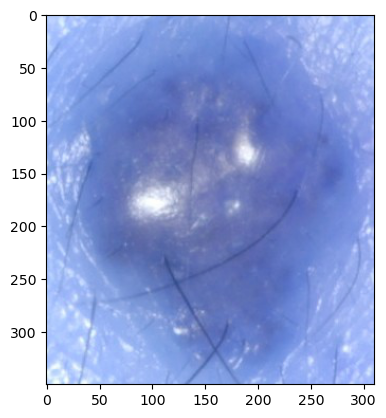

In [30]:
import cv2
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam  # Example optimizer, you can choose a different one

# Load the test image
test_img = cv2.imread(r'C:\Users\musta\Downloads\extracted_data\Skin_Data\testing\0\299.JPG')

plt.imshow(test_img)
plt.show()

test_img = cv2.resize(test_img, (256, 256))

test_input = test_img.reshape((1, 256, 256, 3))

# Create the model
model = Sequential()
# Add layers and configure the model architecture

# Compile the model with an optimizer
optimizer = Adam()  # Example optimizer, you can customize it
model.compile(optimizer=optimizer, loss='binary_crossentropy')  # Specify the loss function as well

# Perform prediction
predictions = model.predict(test_input)
print(predictions)


test_img = cv2.imread(r'C:\Users\musta\Downloads\extracted_data\Skin_Data\testing\0\299.JPG')

plt.imshow(test_img)

test_img.shape

test_img = cv2.resize(test_img,(256,256))  # trained data size is 256 * 256

test_input = test_img.reshape((1,256,256,3))  #   1 image of size 256 * 256 and color image with 3 channels

model.predict(test_input)  # 0 refering to cat and 1 refering to dog

test_img = cv2.imread(r'C:\Users\musta\Downloads\extracted_data\Skin_Data\testing\1\5-01.JPG')

test_img = cv2.resize(test_img,(256,256))  # trained data size is 256 * 256

test_input = test_img.reshape((1,256,256,3))  #   1 image of size 256 * 256 and color image with 3 channels

model.predict(test_input)  # 0 refering to cat and 1 refering to dog
